In [13]:
import pandas as pd
import keras
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 9,6

from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import random
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings(action='ignore')

from generate_custome_models import generate_model1, generate_model2, generate_model3
from generate_pretrained_models import generate_resnet_model, generate_vgg_model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from print_utils import print_model_summaries_side_by_side

import pickle

# Data loading and preparation

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
BATCH_SIZE = 32
INPUT_SHAPE = X_train.shape[1:]
NUM_CLASSES=10

print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

# Fitting the custom deep learning models

In [5]:
LR=1e-3 
EPOCHS=100  
PATIENCE=10
MIN_DELTA=0.01
early_stop = EarlyStopping(monitor='val_accuracy', patience=PATIENCE, min_delta=MIN_DELTA)

model1=generate_model1(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)
model2=generate_model2(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)
model3=generate_model3(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

print_model_summaries_side_by_side([model1, model2, model3])

Model: "Custom_model_1"                                                          | Model: "Custom_model_2"                                                          | Model: "Custom_model_3"                                                         
_________________________________________________________________                | _________________________________________________________________                | _________________________________________________________________               
 Layer (type)                Output Shape              Param #                   |  Layer (type)                Output Shape              Param #                   |  Layer (type)                Output Shape              Param #                  
=================================================================                | =================================================================                | =================================================================               
 conv2d (Con

# Fitting pre-trained arch

In [6]:
resnet_model=generate_resnet_model(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)
vgg_model=generate_vgg_model(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)


print_model_summaries_side_by_side([resnet_model, vgg_model])

Model: "ResNet50"                                                                | Model: "VGG16"                                                                  
_________________________________________________________________                | _________________________________________________________________               
 Layer (type)                Output Shape              Param #                   |  Layer (type)                Output Shape              Param #                  
=================================================================                | =================================================================               
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712                  |  vgg16 (Functional)          (None, 1, 1, 512)         14714688                 
                                                                                 |                                                                                 
 flatten_3 (Flat

### Training testing

In [13]:
history = resnet_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 198s 123ms/step - loss: 2.0709 - accuracy: 0.2476
Epoch 2/10
1563/1563 [==============================] - 192s 123ms/step - loss: 1.9148 - accuracy: 0.3076
Epoch 3/10
1563/1563 [==============================] - 202s 129ms/step - loss: 1.8609 - accuracy: 0.3342
Epoch 4/10
1563/1563 [==============================] - 195s 125ms/step - loss: 1.8262 - accuracy: 0.3490
Epoch 5/10
1563/1563 [==============================] - 188s 120ms/step - loss: 1.7997 - accuracy: 0.3578
Epoch 6/10
1563/1563 [==============================] - 181s 116ms/step - loss: 1.7784 - accuracy: 0.3688
Epoch 7/10
1563/1563 [==============================] - 189s 121ms/step - loss: 1.7649 - accuracy: 0.3704
Epoch 8/10
1563/1563 [==============================] - 198s 126ms/step - loss: 1.7528 - accuracy: 0.3754
Epoch 9/10
1563/1563 [==============================] - 192s 123ms/step - loss: 1.7386 - accuracy: 0.3823
Epoch 10/10
1563/1563 [=======================

In [17]:
test_loss, test_acc = resnet_model.evaluate(X_test, y_test)

313/313 [==============================] - 36s 108ms/step - loss: 1.7213 - accuracy: 0.3894


In [20]:
history.history['accuracy']

[0.247639998793602,
 0.30761998891830444,
 0.3341600000858307,
 0.3490000069141388,
 0.3578200042247772,
 0.3687799870967865,
 0.37040001153945923,
 0.37536001205444336,
 0.3822999894618988,
 0.38367998600006104]

In [7]:
history = model1.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 162s 101ms/step - loss: 1.5170 - accuracy: 0.4920
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.1659 - accuracy: 0.6521
Epoch 3/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.0718 - accuracy: 0.7002
Epoch 4/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.0321 - accuracy: 0.7237
Epoch 5/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.0024 - accuracy: 0.7404


In [8]:
history2 = model2.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 245s 153ms/step - loss: 1.9631 - accuracy: 0.3251
Epoch 2/5
1563/1563 [==============================] - 244s 156ms/step - loss: 1.4576 - accuracy: 0.5277
Epoch 3/5
1563/1563 [==============================] - 261s 167ms/step - loss: 1.2321 - accuracy: 0.6238
Epoch 4/5
1563/1563 [==============================] - 336s 215ms/step - loss: 1.1192 - accuracy: 0.6760
Epoch 5/5
1563/1563 [==============================] - 325s 208ms/step - loss: 1.0645 - accuracy: 0.7013


In [9]:
history3 = model1.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 189s 121ms/step - loss: 0.9836 - accuracy: 0.7512
Epoch 2/5
1563/1563 [==============================] - 177s 113ms/step - loss: 0.9582 - accuracy: 0.7622
Epoch 3/5
1563/1563 [==============================] - 154s 99ms/step - loss: 0.9428 - accuracy: 0.7723
Epoch 4/5
1563/1563 [==============================] - 155s 99ms/step - loss: 0.9369 - accuracy: 0.7792
Epoch 5/5
1563/1563 [==============================] - 163s 104ms/step - loss: 0.9213 - accuracy: 0.7845


Przykładowe trenowanie już z testowym zbiorem, zapisywanie wyników do pickla i odczytywanie. Chyba będzie potem najwyygodniej wizualizować więcej wyników na raz.

In [11]:
history_val = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 165s 105ms/step - loss: 0.9197 - accuracy: 0.7899 - val_loss: 0.9444 - val_accuracy: 0.7842
Epoch 2/10
1563/1563 [==============================] - 187s 120ms/step - loss: 0.9133 - accuracy: 0.7933 - val_loss: 0.9500 - val_accuracy: 0.7846
Epoch 3/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.9090 - accuracy: 0.7970 - val_loss: 0.9299 - val_accuracy: 0.7974
Epoch 4/10
1563/1563 [==============================] - 161s 103ms/step - loss: 0.9013 - accuracy: 0.7994 - val_loss: 0.9601 - val_accuracy: 0.7875
Epoch 5/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.8952 - accuracy: 0.8054 - val_loss: 0.9294 - val_accuracy: 0.7957
Epoch 6/10
1563/1563 [==============================] - 147s 94ms/step - loss: 0.8964 - accuracy: 0.8054 - val_loss: 0.9527 - val_accuracy: 0.7988
Epoch 7/10
1563/1563 [==============================] - 154s 99ms/step - loss: 0.8898 - accuracy: 0.8085 - val_los

In [14]:
with open('history.pickle', 'wb') as file:
    pickle.dump(history_val.history, file)

In [15]:
with open('history.pickle', 'rb') as file:
    loaded_history = pickle.load(file)

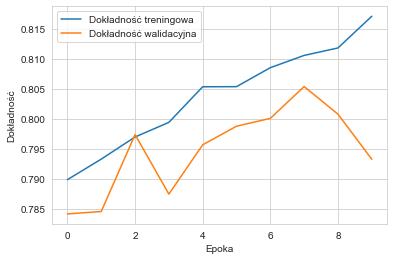

In [17]:
plt.plot(loaded_history['accuracy'], label='Dokładność treningowa')
plt.plot(loaded_history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

#### Comparison of models with defualt parameters

Liczymy sobie 2 customowe maxymalnie i te 2 gotowe, na jakiejś sensownej liczbie epok. Powtarzamy też kilka razy, co najmniej 5 żeby uśrednić i zrobić statystyczną analizę który lepszy. 

#### Ensembling

Tutaj bym spróbował zrobić stacking z tych bazowych modeli, żeby zobaczyć czy coś pomoże. Bo jakby będą gotowe różne modele, więc czemu nie tu. Potem jak mam robić ensembling z modeli, które różnią się tylko jednym hiperparametrem to kicha.

#### Impact of training hiperparameters modififaction

Przetestujemy już na raczej TYLKO jednej architekturze wpływ dwóch hiperparametrów. Na pewno współczynnika uczenia bo łatwy. Podał przykład że można tez epoki bez poprawy, ale przy 10 epokach cieżko szukać :DD Mamy natomiast w implementacji coś takiego jak decay rate i to brzmi spoko. 

#### Impact of regularization hiperparametrs modification

Mamy dropout w sieci customowej, to to przetestujemy. Można jeszcze współczynnik regularyzacji jakoś, ale to wykombinuję jak potem. I też tylko na jednym modelu, bo się nie wygrzebiemy. 

#### Augmentation

Ja bym chyba zrobił porównanie modelu bez augmentacji z modelem z augmentacją dla każdego z 4 przykładów które musimy zrobić. I może wszystkich na raz z brakiem?? No nie wiem, ale to znowu DUUUŻO LICZENIA